In [1]:
#Importing some necessary libraries

import pandas as pd 
import numpy as np
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading and checking our data

df = pd.read_pickle("cleaned_data.pkl")

In [3]:
df

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,BLK,TOV,PF,PTS,WIN_PCT,CONF_RANK,DIV_RANK,player_of_week,player_of_month,MVP
0,76001,1990-91,00,1610612757,POR,23.0,43,0,290.0,55,...,12,22,39,135,0.768,1,1,0,0,0
1,76017,1990-91,00,1610612757,POR,32.0,80,0,1710.0,337,...,13,100,195,890,0.768,1,1,0,0,0
2,95,1990-91,00,1610612757,POR,26.0,53,0,781.0,99,...,12,33,120,272,0.768,1,1,0,0,0
3,76441,1990-91,00,1610612757,POR,34.0,67,1,746.0,57,...,61,22,120,147,0.768,1,1,0,0,0
4,1453,1990-91,00,1610612757,POR,36.0,32,1,439.0,87,...,0,25,42,196,0.768,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18514,78146,1981-82,00,1610612754,IND,25.0,51,0.0,800.0,91,...,1,42,63,212,0.427,8,4,0,0,0
18515,1006,1981-82,00,1610612754,IND,24.0,82,75,2277.0,407,...,178,137,200,942,0.427,8,4,0,0,0
18516,78146,1982-83,00,1610612754,IND,26.0,78,58.0,2435.0,316,...,2,138,185,727,0.244,11,6,0,0,0
18517,1006,1982-83,00,1610612754,IND,25.0,78,74,2513.0,580,...,171,229,230,1315,0.244,11,6,0,0,0


In [4]:
df.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'WIN_PCT', 'CONF_RANK', 'DIV_RANK',
       'player_of_week', 'player_of_month', 'MVP'],
      dtype='object')

In [5]:
df.drop(columns=["LEAGUE_ID","TEAM_ID","TEAM_ABBREVIATION"],inplace=True)

In [6]:
df['SEASON_ID'] = df['SEASON_ID'].map(lambda x: int(x.split("-",1)[0]))

In [7]:
num_cols = ['PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'WIN_PCT', 'CONF_RANK', 'DIV_RANK',
       'player_of_week', 'player_of_month']

In [8]:
pd.set_option("display.max_columns", None)
mvp = df.loc[df['MVP'] == 1]
mvp.head()

,PLAYER_ID,SEASON_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,WIN_PCT,CONF_RANK,DIV_RANK,player_of_week,player_of_month,MVP
625,201566,2016,28.0,81,81,2802.0,824,1941,0.425,200,583,0.343,710,840,0.845,137,727,864,840,132,31,438,190,2558,0.573,6,2,4,2,1
1304,201142,2013,25.0,81,81,3122.0,849,1688,0.503,192,491,0.391,703,805,0.873,58,540,598,445,103,59,285,174,2593,0.720,2,1,6,4,1
1921,1717,2006,29.0,78,78,2820.0,673,1341,0.502,72,173,0.416,498,551,0.904,122,571,693,263,52,62,167,171,1916,0.817,1,1,2,1,1
2232,1449,1983,27.0,79,77,3028.0,758,1542,0.492,18,73,0.247,374,421,0.888,181,615,796,520,144,69,237,197,1908,0.756,1,1,2,0,1
2239,1449,1984,28.0,80,77,3161.0,918,1760,0.522,56,131,0.427,403,457,0.882,164,678,842,531,129,98,248,208,2295,0.768,1,1,1,2,1


In [9]:
mvp.describe()

,SEASON_ID,PLAYER_AGE,MIN,FG_PCT,FG3_PCT,FT_PCT,WIN_PCT,CONF_RANK,DIV_RANK,player_of_week,player_of_month,MVP
count,41.000000,41.000000,41.000000,41.000000,40.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0
mean,1999.951220,28.048780,2916.073171,0.508341,0.293100,0.811317,0.741293,1.487805,1.121951,3.170732,1.707317,1.0
std,12.066381,2.889215,354.996295,0.036600,0.138368,0.081502,0.075042,1.051712,0.331295,1.828967,1.229713,0.0
min,1978.000000,22.000000,1832.000000,0.420000,0.000000,0.524000,0.561000,1.000000,1.000000,0.000000,0.000000,1.0
25%,1990.000000,26.000000,2802.000000,0.493000,0.253750,0.765000,0.707000,1.000000,1.000000,2.000000,1.000000,1.0
50%,2000.000000,28.000000,2998.000000,0.508000,0.326000,0.832000,0.756000,1.000000,1.000000,3.000000,2.000000,1.0
75%,2010.000000,29.000000,3161.000000,0.530000,0.394750,0.873000,0.793000,1.000000,1.000000,5.000000,2.000000,1.0
max,2020.000000,35.000000,3398.000000,0.578000,0.454000,0.921000,0.890000,6.000000,2.000000,7.000000,4.000000,1.0


In [10]:
# standarize data season by season
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for year in  df["SEASON_ID"].unique().tolist():
    for col in num_cols:
        df.loc[df['SEASON_ID']==year, col] = scaler.fit_transform(df.loc[df['SEASON_ID']==year, col].to_numpy().reshape(-1,1))

C:\Users\domin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\domin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\domin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\domin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\domin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\domin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\domin\anaconda3\lib\site-packages\sklearn\preprocessing\_data

In [11]:
#Seperating our current 2022 season from the past 32 seasons. 

train = df.loc[(df['SEASON_ID']>=1990)&(df['SEASON_ID']<=2020),:]
test = df.loc[(df['SEASON_ID']==2021),:]

In [12]:
#Splitting our testing and training dataset so that we train our model with statistics from MVP's

ytrain = train['MVP']
xtrain = train.iloc[:,:-1]

ytest = test['MVP']
xtest = test.iloc[:,:-1]

0    15770
1       31
Name: MVP, dtype: int64


<AxesSubplot:>

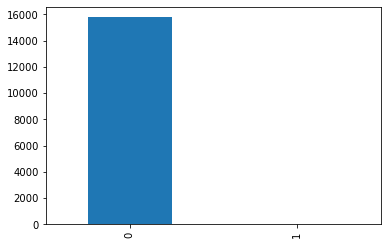

In [13]:
#Getting a look at the amount of MVP's in the last 32 seasons. 

print(ytrain.value_counts())
ytrain.value_counts().plot(kind='bar')

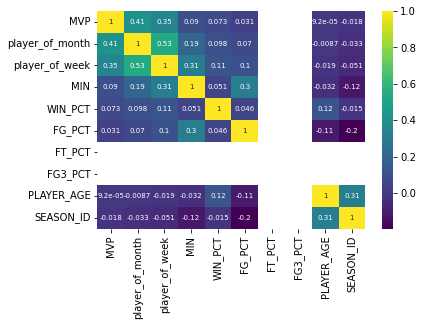

In [14]:
#Looking at a correlation matrix we dont really see any high correlation objects for selecting important features

corrmat = df.corr()
cols=corrmat.nlargest(10, 'MVP')['MVP'].index
cm=np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, annot=True, annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values, cmap = 'viridis')
plt.show()

Text(0, 0.5, 'Importance')

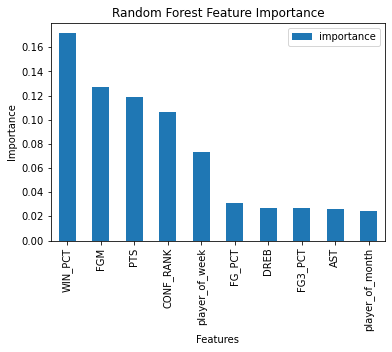

In [15]:
#Feature Selection with Random Forests
#Random forests are able to extract the importance from features in making predictions
#This is good for insight on being able to recognize trends for MVPs. 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0,max_features=20)
rf.fit(xtrain,ytrain)
importance = pd.DataFrame(rf.feature_importances_,index=xtrain.columns.tolist(),columns=['importance']).sort_values(by='importance',ascending=False)
importance.head(10).plot(kind='bar')
plt.title("Random Forest Feature Importance")
plt.xlabel('Features')
plt.ylabel('Importance')

In [67]:

rf = RandomForestClassifier(random_state=0,class_weight="balanced",max_depth=5,criterion='entropy',max_features='auto',n_estimators=100)


In [68]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, random_state=0)

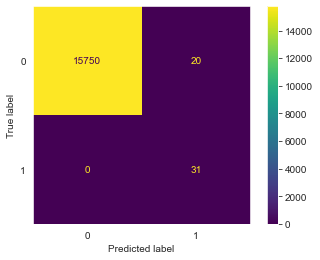

In [69]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
sns.set_style('dark')
plot_confusion_matrix(rf,xtrain,ytrain)

In [42]:
# fit to test set
result = pd.DataFrame(rf.predict_proba(xtest),index = xtest.PLAYER_ID)

result.rename(columns={0:'not',1:'mvp'},inplace=True)

result['y/n'] = rf.predict(xtest)

In [43]:
mvp_candidates = result.sort_values(by='mvp',ascending=False)

In [44]:
mvp_candidates.reset_index(inplace=True)

In [45]:
mvp_candidates.drop(columns=['not'],inplace=True)

In [46]:
from nba_api.stats.static import players
# get_players returns a list of dictionaries, each representing a player.
nba_players = players.get_players()
print('Number of players fetched: {}'.format(len(nba_players)))

Number of players fetched: 4723


In [47]:
nba_players = pd.DataFrame(nba_players)

In [48]:
nba_players.rename(columns={"id":"PLAYER_ID"},inplace = True)

In [49]:
mvp_candidates = mvp_candidates.merge(nba_players.loc[:,['PLAYER_ID','full_name']],on='PLAYER_ID',how='left')

In [50]:
mvp_candidates.head(10)

,PLAYER_ID,mvp,y/n,full_name
0,201939,0.225,0,Stephen Curry
1,201142,0.120,0,Kevin Durant
2,203897,0.120,0,Zach LaVine
3,201942,0.080,0,DeMar DeRozan
4,1628378,0.078,0,Donovan Mitchell
5,1629027,0.054,0,Trae Young
6,1626164,0.044,0,Devin Booker
7,201935,0.031,0,James Harden
8,203507,0.030,0,Giannis Antetokounmpo
9,203497,0.022,0,Rudy Gobert


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Stephen Curry'),
  Text(1, 0, 'Kevin Durant'),
  Text(2, 0, 'Zach LaVine'),
  Text(3, 0, 'DeMar DeRozan'),
  Text(4, 0, 'Donovan Mitchell'),
  Text(5, 0, 'Trae Young'),
  Text(6, 0, 'Devin Booker'),
  Text(7, 0, 'James Harden'),
  Text(8, 0, 'Giannis Antetokounmpo'),
  Text(9, 0, 'Rudy Gobert')])

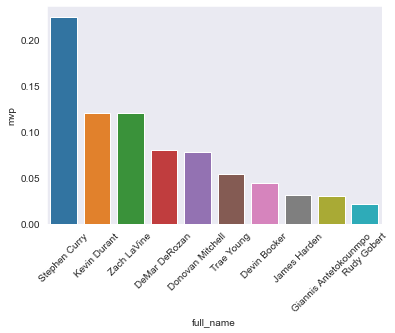

In [51]:
sns.barplot(x='full_name',y='mvp',data=mvp_candidates.head(10))
plt.xticks(rotation=45)

C:\Users\domin\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


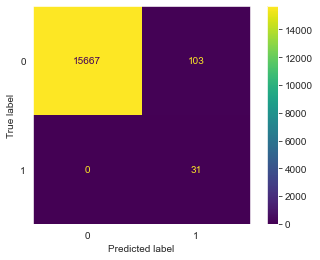

In [29]:
#Now lets try a relatively simple classifer the logistic regression. 

from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(penalty='none',solver='newton-cg',class_weight='balanced')
lr.fit(xtrain,ytrain)

sns.set_style('dark')
plot_confusion_matrix(lr,xtrain,ytrain)

In [30]:
# fit to test set
result = pd.DataFrame(lr.predict_proba(xtest),index = xtest.PLAYER_ID)

result.rename(columns={0:'not',1:'mvp'},inplace=True)

result['y/n'] = lr.predict(xtest)

In [31]:
mvp_candidates = result.sort_values(by='mvp',ascending=False)
mvp_candidates.reset_index(inplace=True)
mvp_candidates.drop(columns=['not'],inplace=True)
mvp_candidates = mvp_candidates.merge(nba_players.loc[:,['PLAYER_ID','full_name']],on='PLAYER_ID',how='left')
mvp_candidates.head(10)

,PLAYER_ID,mvp,y/n,full_name
0,201939,0.928265,1,Stephen Curry
1,201935,0.674823,1,James Harden
2,201142,0.622590,1,Kevin Durant
3,101108,0.214904,0,Chris Paul
4,203897,0.077632,0,Zach LaVine
5,201942,0.016525,0,DeMar DeRozan
6,200768,0.015599,0,Kyle Lowry
7,203497,0.014362,0,Rudy Gobert
8,201566,0.004228,0,Russell Westbrook
9,203507,0.003794,0,Giannis Antetokounmpo


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Stephen Curry'),
  Text(1, 0, 'James Harden'),
  Text(2, 0, 'Kevin Durant'),
  Text(3, 0, 'Chris Paul'),
  Text(4, 0, 'Zach LaVine'),
  Text(5, 0, 'DeMar DeRozan'),
  Text(6, 0, 'Kyle Lowry'),
  Text(7, 0, 'Rudy Gobert'),
  Text(8, 0, 'Russell Westbrook'),
  Text(9, 0, 'Giannis Antetokounmpo')])

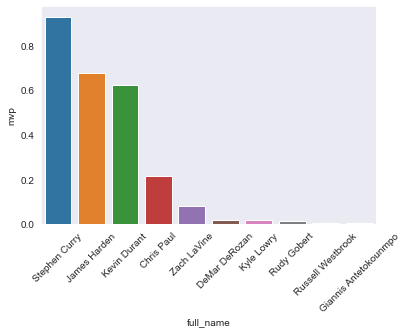

In [32]:
sns.barplot(x='full_name',y='mvp',data=mvp_candidates.head(10))
plt.xticks(rotation=45)

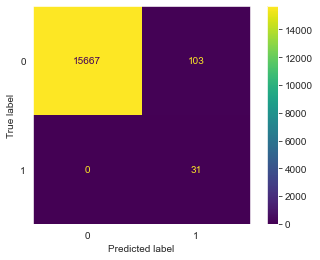

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(10)
knn.fit(xtrain,ytrain)   

sns.set_style('dark')
plot_confusion_matrix(lr,xtrain,ytrain)


In [34]:
# fit to test set
result = pd.DataFrame(knn.predict_proba(xtest),index = xtest.PLAYER_ID)

result.rename(columns={0:'not',1:'mvp'},inplace=True)

result['y/n'] = lr.predict(xtest)

In [35]:
mvp_candidates = result.sort_values(by='mvp',ascending=False)
mvp_candidates.reset_index(inplace=True)
mvp_candidates.drop(columns=['not'],inplace=True)
mvp_candidates = mvp_candidates.merge(nba_players.loc[:,['PLAYER_ID','full_name']],on='PLAYER_ID',how='left')
mvp_candidates.head(10)

,PLAYER_ID,mvp,y/n,full_name
0,203507,0.2,0,Giannis Antetokounmpo
1,204001,0.1,0,Kristaps Porzingis
2,203999,0.1,0,Nikola Jokic
3,1630173,0.0,0,Precious Achiuwa
4,1629646,0.0,0,Charles Bassey
5,1628420,0.0,0,Monte Morris
6,1630192,0.0,0,Zeke Nnaji
7,1629008,0.0,0,Michael Porter Jr.
8,1628432,0.0,0,Davon Reed
9,203085,0.0,0,Austin Rivers


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Giannis Antetokounmpo'),
  Text(1, 0, 'Kristaps Porzingis'),
  Text(2, 0, 'Nikola Jokic'),
  Text(3, 0, 'Precious Achiuwa'),
  Text(4, 0, 'Charles Bassey'),
  Text(5, 0, 'Monte Morris'),
  Text(6, 0, 'Zeke Nnaji'),
  Text(7, 0, 'Michael Porter Jr.'),
  Text(8, 0, 'Davon Reed'),
  Text(9, 0, 'Austin Rivers')])

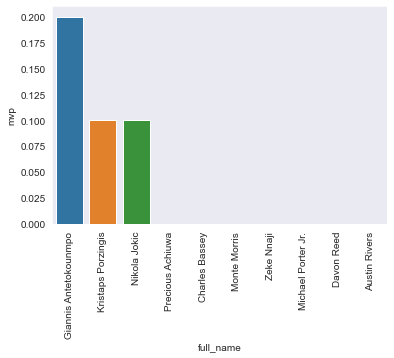

In [36]:
sns.barplot(x='full_name',y='mvp',data=mvp_candidates.head(10))
plt.xticks(rotation=90)

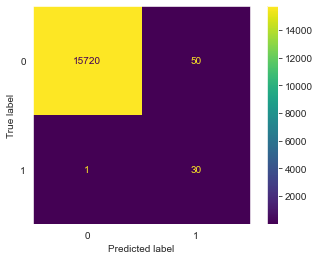

In [37]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ada = AdaBoostClassifier(n_estimators=12, learning_rate=2)
ada.fit(xtrain,ytrain)

sns.set_style('dark')
plot_confusion_matrix(ada,xtrain,ytrain)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Kevin Durant'),
  Text(1, 0, 'Devin Booker'),
  Text(2, 0, 'James Harden'),
  Text(3, 0, 'Stephen Curry'),
  Text(4, 0, 'Jimmy Butler'),
  Text(5, 0, 'Miles Bridges'),
  Text(6, 0, 'Chris Paul'),
  Text(7, 0, 'Kyle Lowry'),
  Text(8, 0, 'Donovan Mitchell'),
  Text(9, 0, 'Rudy Gobert')])

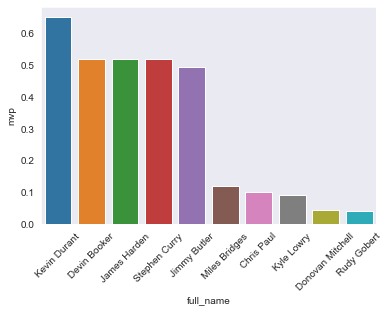

In [38]:
result = pd.DataFrame(ada.predict_proba(xtest),index = xtest.PLAYER_ID)

result.rename(columns={0:'not',1:'mvp'},inplace=True)

result['y/n'] = ada.predict(xtest)

mvp_candidates = result.sort_values(by='mvp',ascending=False)
mvp_candidates.reset_index(inplace=True)
mvp_candidates.drop(columns=['not'],inplace=True)
mvp_candidates = mvp_candidates.merge(nba_players.loc[:,['PLAYER_ID','full_name']],on='PLAYER_ID',how='left')
mvp_candidates.head(10)

sns.barplot(x='full_name',y='mvp',data=mvp_candidates.head(10))
plt.xticks(rotation=45)